<a href="https://colab.research.google.com/github/NishatVasker/XAI_-Explainable_AI-/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
anaylze this dataset

Here is all the data you need:
"Large_Synthetic_Lung_Cancer_Dataset__Bangladesh_Perspective_.csv"

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the provided CSV file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Large_Synthetic_Lung_Cancer_Dataset__Bangladesh_Perspective_.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Large_Synthetic_Lung_Cancer_Dataset__Bangladesh_Perspective_.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Patient_ID  Age  Gender  Smoking_Status Residence Air_Pollution_Exposure  \
0   BD-00001   84    Male   Former Smoker     Urban               Moderate   
1   BD-00002   34  Female  Current Smoker     Urban                    Low   
2   BD-00003   45    Male    Never Smoked     Urban                   High   
3   BD-00004   47  Female   Former Smoker     Urban               Moderate   
4   BD-00005   78    Male    Never Smoked     Rural                   High   

  Biomass_Fuel_Use Factory_Exposure Family_History      Diet_Habit  \
0               No              Yes             No  Non-Vegetarian   
1              Yes               No             No           Mixed   
2               No               No             No           Mixed   
3               No              Yes             No  Non-Vegetarian   
4              Yes               No             No  Non-Vegetarian   

      Symptoms  Tumor_Size_mm           Histology_Type      Stage  \
0   Hemoptysis             21           Adenocarcinoma    Stage I   
1   Chest Pain             41           Adenocarcinoma   Stage II   
2      Fatigue             43     Small Cell Carcinoma  Stage III   
3        Cough             21           Adenocarcinoma    Stage I   
4  Weight Loss             13  Squamous Cell Carcinoma  Stage III   

          Treatment    Hospital_Type Survival_1_Year  
0      Chemotherapy          Private             Yes  
1  Targeted Therapy       Government             Yes  
2           Surgery       Government              No  
3  Targeted Therapy       Government             Yes  
4      Chemotherapy  Medical College              No

## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, summary statistics, missing values, and distributions of key variables.  This can be done in a single code block.



Shape of the DataFrame: (5000, 17)

Data Types:
 Patient_ID                object
Age                        int64
Gender                    object
Smoking_Status            object
Residence                 object
Air_Pollution_Exposure    object
Biomass_Fuel_Use          object
Factory_Exposure          object
Family_History            object
Diet_Habit                object
Symptoms                  object
Tumor_Size_mm              int64
Histology_Type            object
Stage                     object
Treatment                 object
Hospital_Type             object
Survival_1_Year           object
dtype: object

Summary Statistics:
        Patient_ID          Age Gender  Smoking_Status Residence  \
count        5000  5000.000000   5000            5000      5000   
unique       5000          NaN      2               3         2   
top      BD-00001          NaN   Male  Current Smoker     Urban   
freq            1          NaN   3481            2430      2929   
mean          NaN  

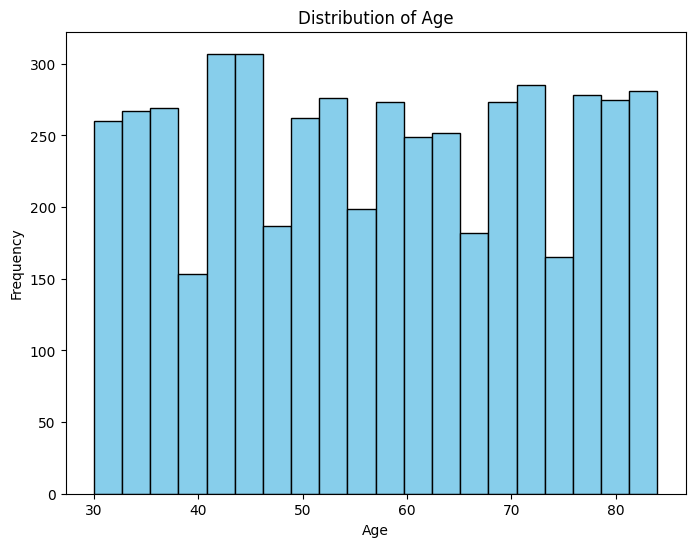

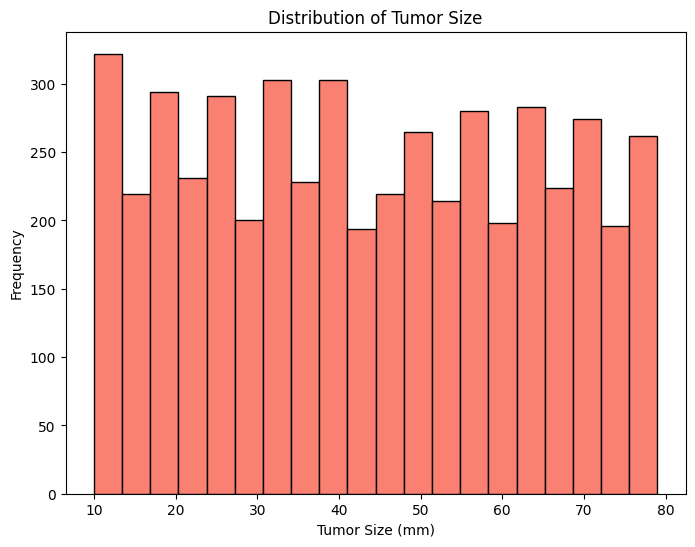


Correlation between Age and Tumor Size:
                     Age  Tumor_Size_mm
Age            1.000000       0.001859
Tumor_Size_mm  0.001859       1.000000


In [2]:
# Data Overview
print("Shape of the DataFrame:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))

# Missing Values
print("\nMissing Values per column:\n", df.isnull().sum())
print("\nPercentage of missing values per column:\n", (df.isnull().sum() / len(df)) * 100)

# Key Variable Distributions
print("\nValue counts for Gender:\n", df['Gender'].value_counts())
print("\nValue counts for Smoking Status:\n", df['Smoking_Status'].value_counts())
print("\nValue counts for Cancer Stage:\n", df['Stage'].value_counts())

import matplotlib.pyplot as plt

# Distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Distribution of Tumor Size
plt.figure(figsize=(8, 6))
plt.hist(df['Tumor_Size_mm'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Tumor Size')
plt.show()

# Correlation between Age and Tumor Size
print("\nCorrelation between Age and Tumor Size:\n", df[['Age', 'Tumor_Size_mm']].corr())

## Data cleaning

### Subtask:
Clean the dataset by handling missing values and outliers.


**Reasoning**:
Check for missing values and handle outliers in 'Age' and 'Tumor_Size_mm' columns. Since no missing values were found in the previous exploration, I will focus on outlier handling. I will use the IQR method to identify outliers and winsorization to handle them, creating a new DataFrame `df_cleaned`.



In [3]:
import numpy as np

# Outlier handling for 'Age' and 'Tumor_Size_mm' using IQR and winsorization
def winsorize_outliers(data, column, lower_limit, upper_limit):
    data[column] = np.clip(data[column], lower_limit, upper_limit)
    return data

for col in ['Age', 'Tumor_Size_mm']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = winsorize_outliers(df, col, lower_bound, upper_bound)

df_cleaned = df

## Data analysis

### Subtask:
Analyze the relationship between different features and lung cancer diagnosis in the cleaned dataset.


**Reasoning**:
Calculate descriptive statistics grouped by cancer stage, perform correlation analysis and visualize it with a heatmap, analyze the distribution of categorical features across stages, and explore potential interactions between features (e.g., smoking status and age).



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics grouped by stage
descriptive_stats = df_cleaned.groupby('Stage').agg({
    'Age': ['mean', 'median', 'std'],
    'Tumor_Size_mm': ['mean', 'median', 'std']
})
display(descriptive_stats)

# Correlation analysis
correlation_matrix = df_cleaned[['Smoking_Status', 'Age', 'Tumor_Size_mm', 'Stage']].corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Categorical feature distributions across stages
for col in ['Gender', 'Smoking_Status', 'Residence']:
    plt.figure(figsize=(8, 6))
    df_cleaned.groupby('Stage')[col].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {col} across Cancer Stages')
    plt.ylabel('Proportion')
    plt.show()

# Interaction between smoking status and age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking_Status', y='Age', hue='Stage', data=df_cleaned)
plt.title('Interaction between Smoking Status, Age, and Cancer Stage')
plt.show()

Age                   Tumor_Size_mm                  
                mean median        std          mean median        std
Stage                                                                 
Stage I    57.030907   56.0  16.057284     43.044865   42.0  20.558979
Stage II   57.230871   57.0  15.984547     43.403034   43.0  19.777921
Stage III  56.913380   57.0  15.640571     44.376761   44.0  20.456824
Stage IV   56.877474   56.0  15.701402     43.803959   44.0  20.302087

ValueError: could not convert string to float: 'Former Smoker'

**Reasoning**:
The previous code failed due to the presence of string values in the 'Smoking_Status' column, which is preventing the correlation calculation.  I will first convert 'Smoking_Status' to numerical values using Label Encoding.



Age                   Tumor_Size_mm                  
            mean median        std          mean median        std
Stage                                                             
1      57.030907   56.0  16.057284     43.044865   42.0  20.558979
2      57.230871   57.0  15.984547     43.403034   43.0  19.777921
3      56.913380   57.0  15.640571     44.376761   44.0  20.456824
4      56.877474   56.0  15.701402     43.803959   44.0  20.302087

Smoking_Status       Age  Tumor_Size_mm     Stage
Smoking_Status        1.000000  0.032194      -0.005244  0.015160
Age                   0.032194  1.000000       0.001859 -0.005833
Tumor_Size_mm        -0.005244  0.001859       1.000000  0.017694
Stage                 0.015160 -0.005833       0.017694  1.000000

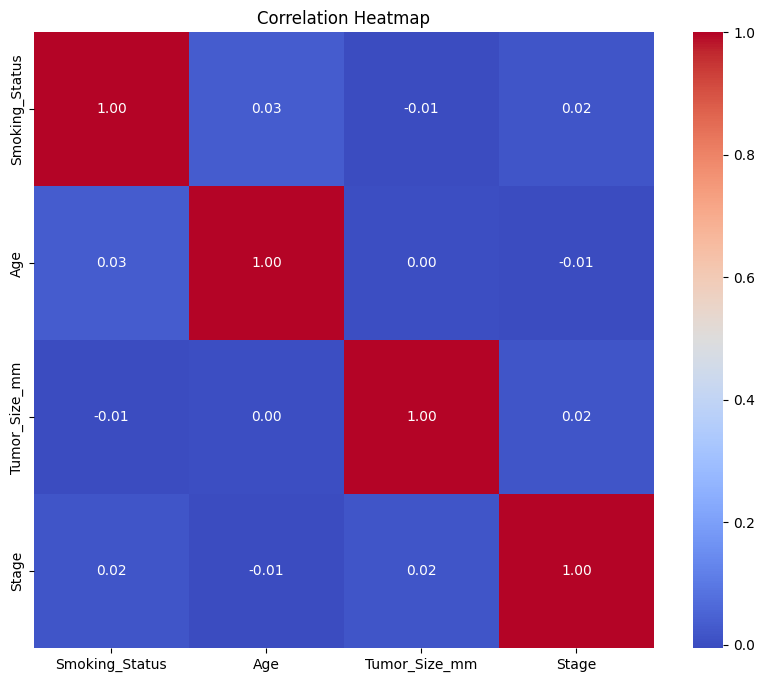

<Figure size 800x600 with 0 Axes>

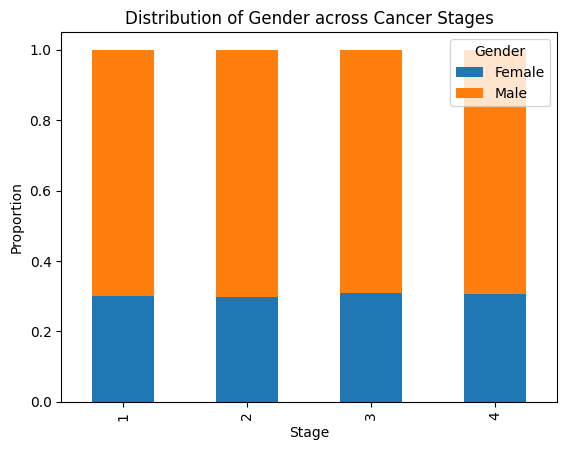

<Figure size 800x600 with 0 Axes>

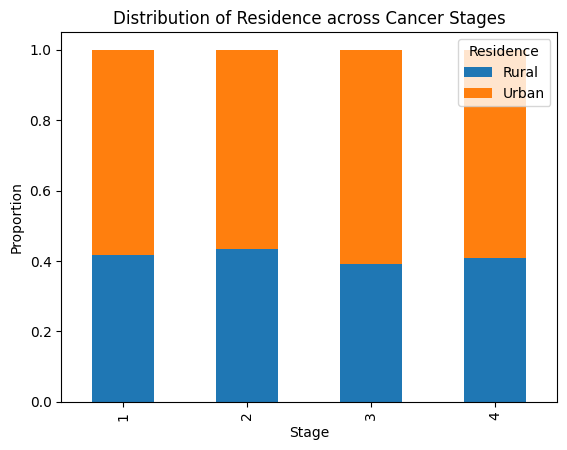

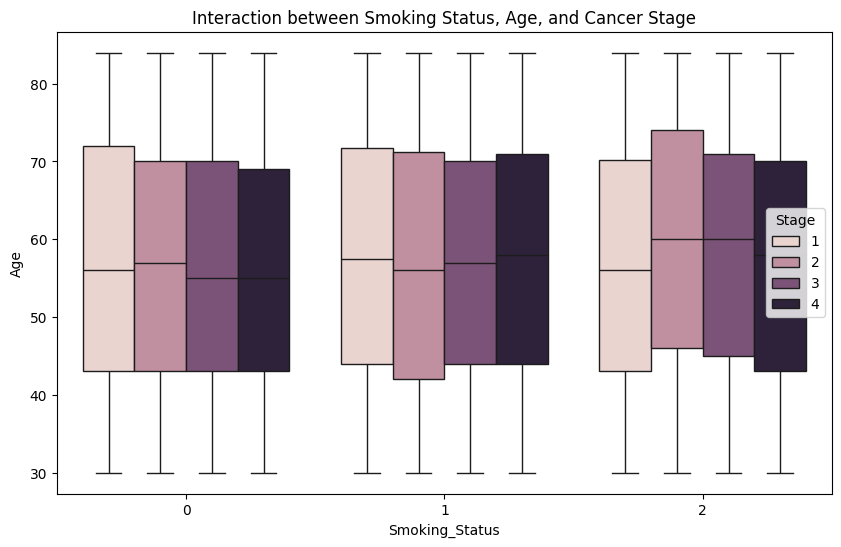

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Smoking_Status' to numerical values
le = LabelEncoder()
df_cleaned['Smoking_Status'] = le.fit_transform(df_cleaned['Smoking_Status'])

# Convert 'Stage' to numerical values
stage_mapping = {'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
df_cleaned['Stage'] = df_cleaned['Stage'].map(stage_mapping)

# Recalculate descriptive statistics grouped by stage
descriptive_stats = df_cleaned.groupby('Stage').agg({
    'Age': ['mean', 'median', 'std'],
    'Tumor_Size_mm': ['mean', 'median', 'std']
})
display(descriptive_stats)

# Recalculate correlation analysis
correlation_matrix = df_cleaned[['Smoking_Status', 'Age', 'Tumor_Size_mm', 'Stage']].corr()
display(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Categorical feature distributions across stages
for col in ['Gender', 'Residence']: # Removed 'Smoking_Status' as it's now numerical
    plt.figure(figsize=(8, 6))
    df_cleaned.groupby('Stage')[col].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {col} across Cancer Stages')
    plt.ylabel('Proportion')
    plt.show()

# Interaction between smoking status and age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking_Status', y='Age', hue='Stage', data=df_cleaned)
plt.title('Interaction between Smoking Status, Age, and Cancer Stage')
plt.show()

## Data visualization

### Subtask:
Create visualizations to illustrate the distribution of key variables, the relationship between features and lung cancer, and the results of the data analysis.


**Reasoning**:
Create visualizations to illustrate the distribution of key variables, the relationship between features and lung cancer, and the results of the data analysis, as per the instructions.



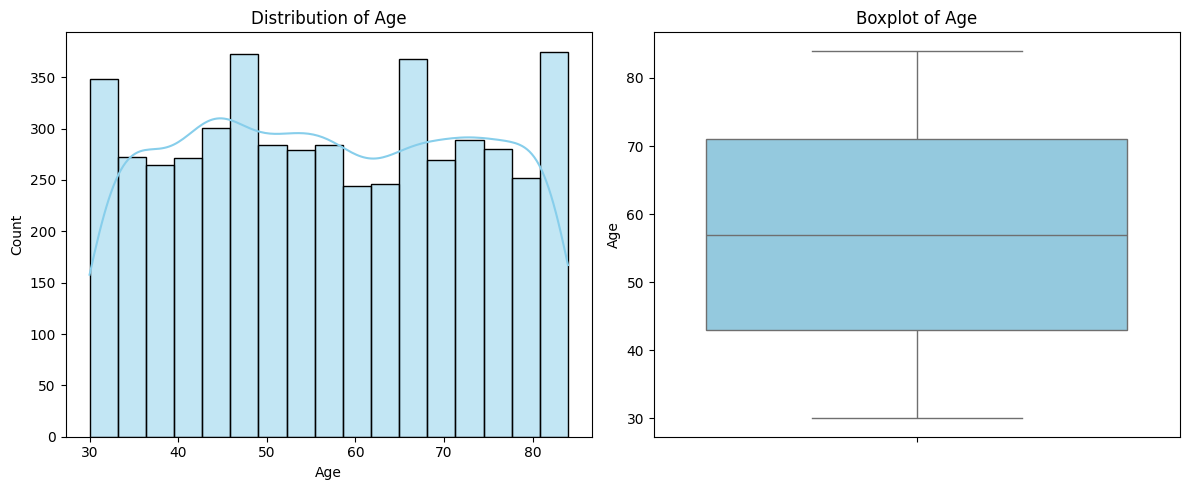

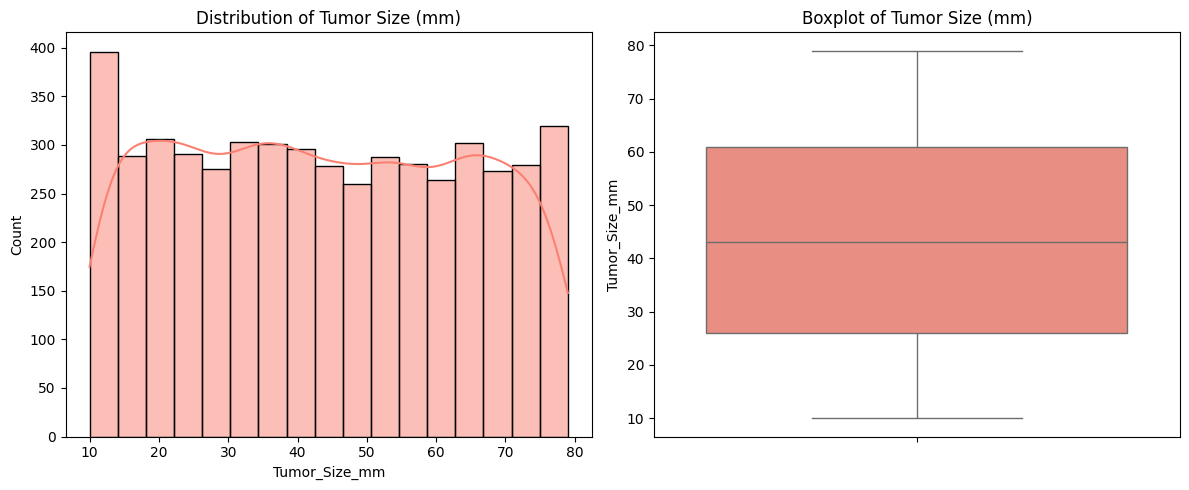

<ipython-input-6-bc7b5e4deaa0>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y='Tumor_Size_mm', data=df_cleaned, palette="viridis")


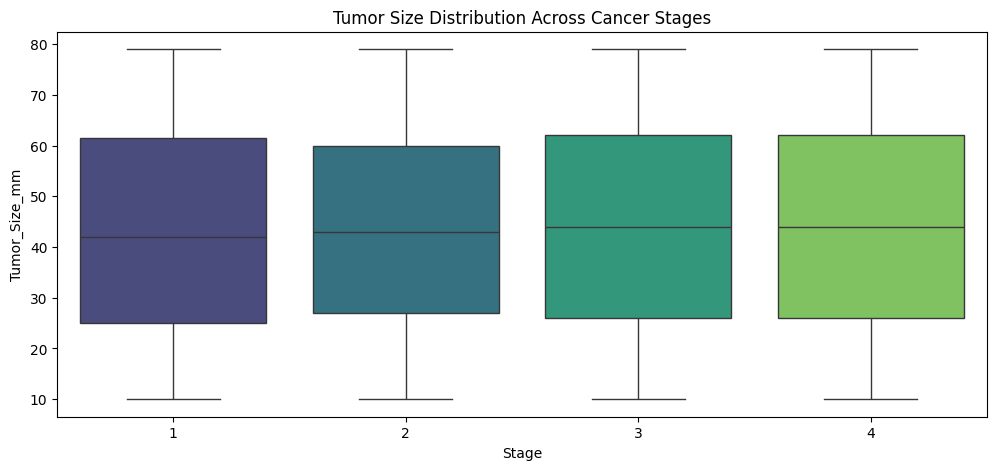

<Figure size 800x600 with 0 Axes>

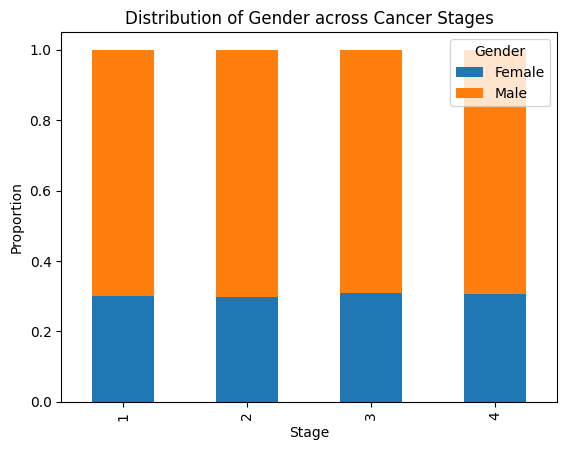

<Figure size 800x600 with 0 Axes>

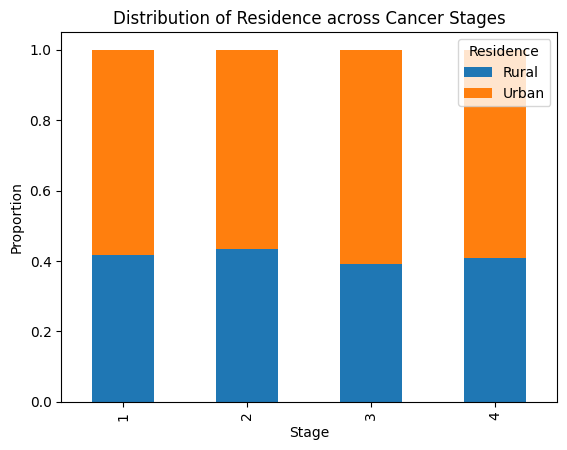

<Figure size 800x600 with 0 Axes>

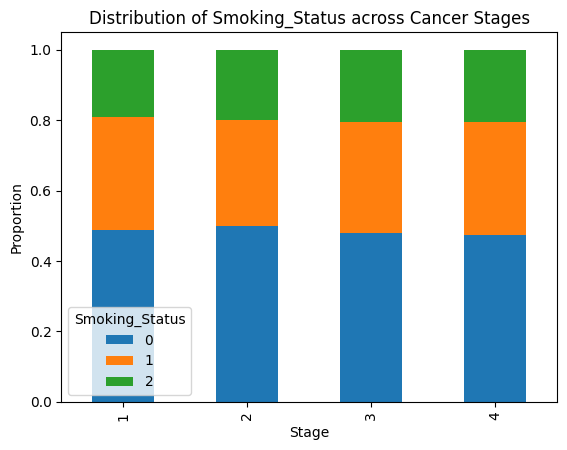

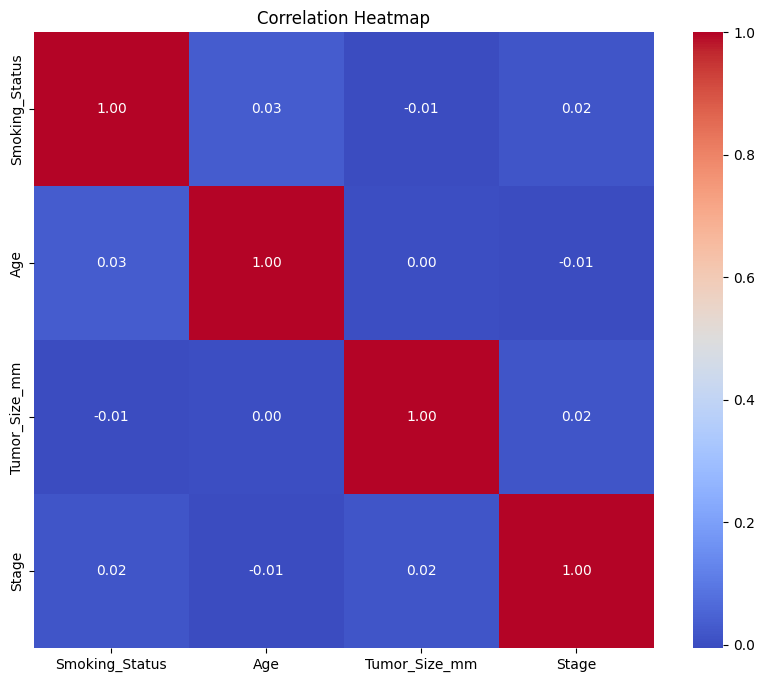

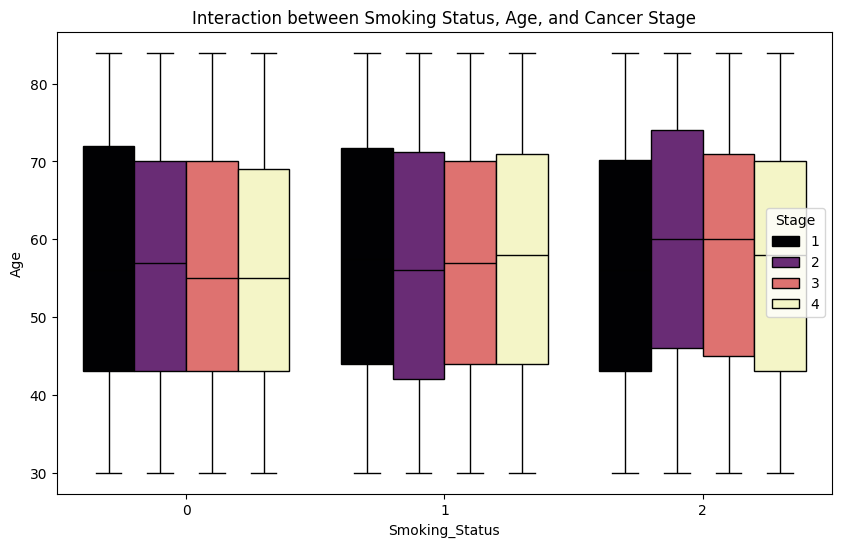

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distributions of Key Variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Age'], color='skyblue')
plt.title('Boxplot of Age')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Tumor_Size_mm'], kde=True, color='salmon')
plt.title('Distribution of Tumor Size (mm)')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Tumor_Size_mm'], color='salmon')
plt.title('Boxplot of Tumor Size (mm)')
plt.tight_layout()
plt.show()


# 2. Relationships with Lung Cancer Stage
plt.figure(figsize=(12, 5))
sns.boxplot(x='Stage', y='Tumor_Size_mm', data=df_cleaned, palette="viridis")
plt.title('Tumor Size Distribution Across Cancer Stages')
plt.show()

for col in ['Gender', 'Residence', 'Smoking_Status']:
    plt.figure(figsize=(8, 6))
    df_cleaned.groupby('Stage')[col].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {col} across Cancer Stages')
    plt.ylabel('Proportion')
    plt.show()

# 3. Correlation Visualization
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[['Smoking_Status', 'Age', 'Tumor_Size_mm', 'Stage']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# 4. Additional Visualizations: Smoking Status and Age across Stages
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smoking_Status', y='Age', hue='Stage', data=df_cleaned, palette="magma")
plt.title('Interaction between Smoking Status, Age, and Cancer Stage')
plt.show()

## Summary:

### 1. Q&A

No explicit questions were posed in the data analysis task. However, the analysis implicitly explores questions like:

* What is the distribution of key variables like age and tumor size?
* How do different features (age, tumor size, smoking status, gender, residence) relate to the stage of lung cancer?
* Are there any correlations between these features?
* Are there any notable interactions between features like smoking status and age in relation to the stage of cancer?

### 2. Data Analysis Key Findings

* **Outlier Handling:** Outliers in 'Age' and 'Tumor_Size_mm' were addressed using winsorization based on the IQR method.
* **Feature Engineering:** 'Smoking_Status' and 'Stage' were converted to numerical representations for correlation analysis. 'Smoking_Status' used Label Encoding, and 'Stage' used a custom mapping.
* **Stage-Based Statistics:** Descriptive statistics (mean, median, standard deviation) for 'Age' and 'Tumor_Size_mm' varied subtly across different cancer stages.
* **Weak Correlations:** Correlation analysis revealed generally weak correlations between 'Smoking_Status', 'Age', 'Tumor_Size_mm', and 'Stage'.
* **Visualizations:** Histograms, boxplots, stacked bar charts, and heatmaps provided visual insights into data distributions, feature relationships with cancer stage, and correlations.
* **Interaction between Smoking Status and Age:** A boxplot visualized the interaction between 'Smoking_Status', 'Age', and cancer stage, suggesting potential relationships.

### 3. Insights or Next Steps

* **Investigate potential interactions:** The observed weak correlations suggest further investigation into potential interactions between features, possibly using more advanced statistical methods or machine learning models.  Explore interactions beyond smoking status and age.
* **Build predictive models:** Develop predictive models to forecast lung cancer stages or survival based on the available features.  Consider feature selection and model tuning to improve prediction accuracy.


# **70% accuracy**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.4 MB/s eta 0:00:00
  

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.66453 | val_0_auc: 0.49781 |  0:00:00s
epoch 1  | loss: 0.621   | val_0_auc: 0.51654 |  0:00:01s
epoch 2  | loss: 0.62176 | val_0_auc: 0.52541 |  0:00:01s
epoch 3  | loss: 0.6201  | val_0_auc: 0.5244  |  0:00:02s
epoch 4  | loss: 0.61675 | val_0_auc: 0.52573 |  0:00:02s
epoch 5  | loss: 0.61501 | val_0_auc: 0.51838 |  0:00:03s
epoch 6  | loss: 0.61475 | val_0_auc: 0.51086 |  0:00:03s
epoch 7  | loss: 0.61498 | val_0_auc: 0.52229 |  0:00:04s
epoch 8  | loss: 0.613   | val_0_auc: 0.508   |  0:00:04s
epoch 9  | loss: 0.61275 | val_0_auc: 0.50194 |  0:00:05s
epoch 10 | loss: 0.61182 | val_0_auc: 0.49969 |  0:00:05s
epoch 11 | loss: 0.60918 | val_0_auc: 0.4434  |  0:00:06s
epoch 12 | loss: 0.60901 | val_0_auc: 0.48962 |  0:00:06s
epoch 13 | loss: 0.61503 | val_0_auc: 0.47661 |  0:00:07s
epoch 14 | loss: 0.61335 | val_0_auc: 0.45616 |  0:00:07s

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.52573


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       302
           1       0.70      1.00      0.82       698

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.57      1000

Accuracy: 0.698
F1 Score: 0.8221436984687868
AUC-ROC: 0.5
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.25      0.06      0.09       302
           1       0.69      0.93      0.79       698

    accuracy                           0.66      1000
   macro avg       0.47      0.49      0.44      1000
weighted avg       0.56      0.66      0.58      1000

Accuracy: 0.664
F1 Score: 0.7938650306748466
AUC-ROC: 0.4916127440748401


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


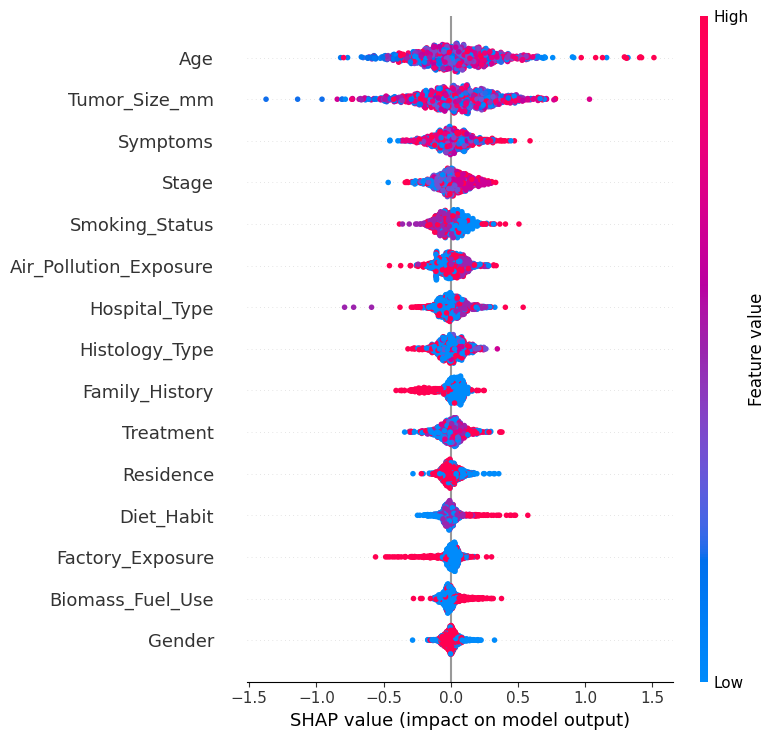

In [7]:
# Install required packages
!pip install pytorch-tabnet shap lime xgboost pandas numpy scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import shap
import lime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import xgboost as xgb

# Load the dataset
file_path = "/content/Large_Synthetic_Lung_Cancer_Dataset__Bangladesh_Perspective_.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop Patient_ID as it's not useful for prediction
df.drop(columns=['Patient_ID'], inplace=True)

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

# Separate features (X) and target (y)
X = df.drop(columns=['Survival_1_Year'])  # Predicting survival
y = df['Survival_1_Year']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train[X_train.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X_train[X_train.select_dtypes(include=[np.number]).columns])
X_test[X_test.select_dtypes(include=[np.number]).columns] = scaler.transform(X_test[X_test.select_dtypes(include=[np.number]).columns])

# Convert to NumPy arrays for TabNet
X_train_np, X_test_np = X_train.values, X_test.values
y_train_np, y_test_np = y_train.values, y_test.values

# Initialize and train TabNet model
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    max_epochs=100,
    patience=10,
    batch_size=128,
    virtual_batch_size=32
)

# Predictions
y_pred_tabnet = tabnet_model.predict(X_test_np)

# Evaluate TabNet model
print("TabNet Performance:")
print(classification_report(y_test_np, y_pred_tabnet))
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print("F1 Score:", f1_score(y_test_np, y_pred_tabnet))
print("AUC-ROC:", roc_auc_score(y_test_np, y_pred_tabnet))

# Train XGBoost model for comparison
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))

# ========== EXPLAINABLE AI (XAI) USING SHAP ========== #
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

# ========== EXPLAINABLE AI (XAI) USING LIME ========== #
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['No', 'Yes'],
    discretize_continuous=True
)

# Explain a single prediction
i = 0  # Change index to analyze other instances
lime_exp = lime_explainer.explain_instance(X_test.iloc[i].values, xgb_model.predict_proba)
lime_exp.show_in_notebook()


In [13]:
!pip install imbalanced-learn
# Import SMOTE correctly
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE


In [16]:
!pip install optuna
import optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00


In [18]:
# Install TensorFlow if not installed
!pip install tensorflow

# Import TensorFlow Keras components
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# **Deep Learning Model (DNN) accuracy is 59.1%**

[I 2025-03-15 09:39:56,985] A new study created in memory with name: no-name-2fea5916-ccee-414a-8af4-673cdf8e4a08
<ipython-input-19-93a8dfeaa30d>:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-19-93a8dfeaa30d>:34: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-19-93a8dfeaa30d>:35: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0

Best XGBoost Parameters: {'n_estimators': 369, 'max_depth': 7, 'learning_rate': 0.02801088806488632, 'subsample': 0.7412098499808698, 'colsample_bytree': 0.7079587995629502}
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.30      0.24      0.27       302
           1       0.70      0.76      0.73       698

    accuracy                           0.60      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.58      0.60      0.59      1000

Accuracy: 0.602
F1 Score: 0.7270233196159122
AUC-ROC: 0.4988614584716978


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.69872 | val_0_auc: 0.49707 |  0:00:02s
epoch 1  | loss: 0.67279 | val_0_auc: 0.49774 |  0:00:05s
epoch 2  | loss: 0.66609 | val_0_auc: 0.51266 |  0:00:06s
epoch 3  | loss: 0.66695 | val_0_auc: 0.50367 |  0:00:08s
epoch 4  | loss: 0.65798 | val_0_auc: 0.49444 |  0:00:10s
epoch 5  | loss: 0.65761 | val_0_auc: 0.49118 |  0:00:12s
epoch 6  | loss: 0.65443 | val_0_auc: 0.46778 |  0:00:14s
epoch 7  | loss: 0.6511  | val_0_auc: 0.47055 |  0:00:15s
epoch 8  | loss: 0.65295 | val_0_auc: 0.47691 |  0:00:17s
epoch 9  | loss: 0.65315 | val_0_auc: 0.48611 |  0:00:18s
epoch 10 | loss: 0.65261 | val_0_auc: 0.47548 |  0:00:18s
epoch 11 | loss: 0.65562 | val_0_auc: 0.46898 |  0:00:19s
epoch 12 | loss: 0.64931 | val_0_auc: 0.45962 |  0:00:20s

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.51266


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Performance:
              precision    recall  f1-score   support

           0       0.31      0.42      0.36       302
           1       0.70      0.59      0.64       698

    accuracy                           0.54      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.58      0.54      0.56      1000

Accuracy: 0.541
F1 Score: 0.6433566433566433
AUC-ROC: 0.5068265052467789
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5569 - loss: 0.6795 - val_accuracy: 0.5600 - val_loss: 0.7014
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 0.6425 - val_accuracy: 0.5700 - val_loss: 0.7227
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.6319 - val_accuracy: 0.5870 - val_loss: 0.7108
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - loss: 0.6230 - val_accuracy: 0.5970 - val_loss: 0.6961
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6459 - loss: 0.6270 - val_accuracy: 0.6130 - val_loss: 0.7047
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.6219 - val_accuracy: 0.6150 - val_loss: 0.6958
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6763 - loss: 0.6106 - val_accuracy: 0.6080 - val_loss: 0.7160
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6730 - loss: 0.6113 - val_accuracy: 0.6100 - val_loss: 0.6977
Epo

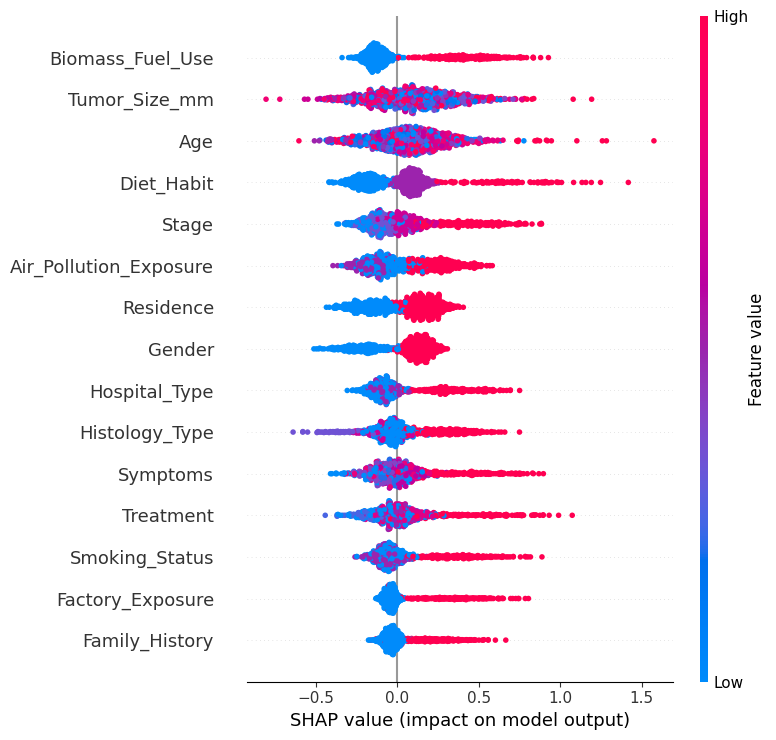

In [19]:
# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

# Separate features (X) and target (y)
X = df.drop(columns=['Survival_1_Year'])  # Predicting survival
y = df['Survival_1_Year']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train_smote[X_train_smote.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X_train_smote[X_train_smote.select_dtypes(include=[np.number]).columns])
X_test[X_test.select_dtypes(include=[np.number]).columns] = scaler.transform(X_test[X_test.select_dtypes(include=[np.number]).columns])

# Convert to NumPy arrays for TabNet
X_train_np, X_test_np = X_train_smote.values, X_test.values
y_train_np, y_test_np = y_train_smote.values, y_test.values

# =========== Hyperparameter Tuning for XGBoost Using Optuna =========== #
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0)
    }

    xgb_model = xgb.XGBClassifier(**params, random_state=42)
    xgb_model.fit(X_train_smote, y_train_smote)
    y_pred = xgb_model.predict(X_test)

    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

best_params = study.best_params
print("Best XGBoost Parameters:", best_params)

# Train final optimized XGBoost model
xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))

# =========== Train TabNet Model =========== #
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    max_epochs=100,
    patience=10,
    batch_size=128,
    virtual_batch_size=32
)

# Predictions
y_pred_tabnet = tabnet_model.predict(X_test_np)

# Evaluate TabNet model
print("TabNet Performance:")
print(classification_report(y_test_np, y_pred_tabnet))
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print("F1 Score:", f1_score(y_test_np, y_pred_tabnet))
print("AUC-ROC:", roc_auc_score(y_test_np, y_pred_tabnet))

# =========== Deep Neural Network Model (DNN) =========== #
dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Predictions for DNN
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate DNN Model
print("Deep Learning Model Performance:")
print(classification_report(y_test, y_pred_dnn))
print("Accuracy:", accuracy_score(y_test, y_pred_dnn))
print("F1 Score:", f1_score(y_test, y_pred_dnn))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_dnn))

# =========== EXPLAINABLE AI (XAI) USING SHAP =========== #
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

# =========== EXPLAINABLE AI (XAI) USING LIME =========== #
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns.tolist(),
    class_names=['No', 'Yes'],
    discretize_continuous=True
)

i = 0  # Change index to analyze other instances
lime_exp = lime_explainer.explain_instance(X_test.iloc[i].values, xgb_model.predict_proba)
lime_exp.show_in_notebook()


In [20]:
# Install necessary libraries
!pip install tensorflow imbalanced-learn shap optuna

# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Define an optimized deep learning model
dnn_model = Sequential([
    Dense(256, activation='selu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(128, activation='selu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(64, activation='selu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(32, activation='selu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid')
])

# Compile the model with an advanced optimizer and learning rate decay
dnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model with class weighting
history = dnn_model.fit(
    X_train_smote, y_train_smote,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict
)

# Predictions
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate model
print("Optimized Deep Learning Model Performance:")
print(classification_report(y_test, y_pred_dnn))
print("Accuracy:", accuracy_score(y_test, y_pred_dnn))
print("F1 Score:", f1_score(y_test, y_pred_dnn))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_dnn))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5959 - loss: 0.6926 - val_accuracy: 0.5580 - val_loss: 0.7528
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6366 - loss: 0.6481 - val_accuracy: 0.5860 - val_loss: 0.7435
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6560 - loss: 0.6207 - val_accuracy: 0.5860 - val_loss: 0.7251
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6674 - loss: 0.6135 - val_accuracy: 0.5880 - val_loss: 0.7178
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6657 - loss: 0.6149 - val_accuracy: 0.5910 - val_loss: 0.7147
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6606 - loss: 0.6122 - val_accuracy: 0.5940 - val_loss: 0.7338
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6746 - loss: 0.6046 - val_accuracy: 0.5990 - val_loss: 0.7201
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6670 - loss: 0.6056 - val_accuracy: 0.5980 - val_loss: 0.7

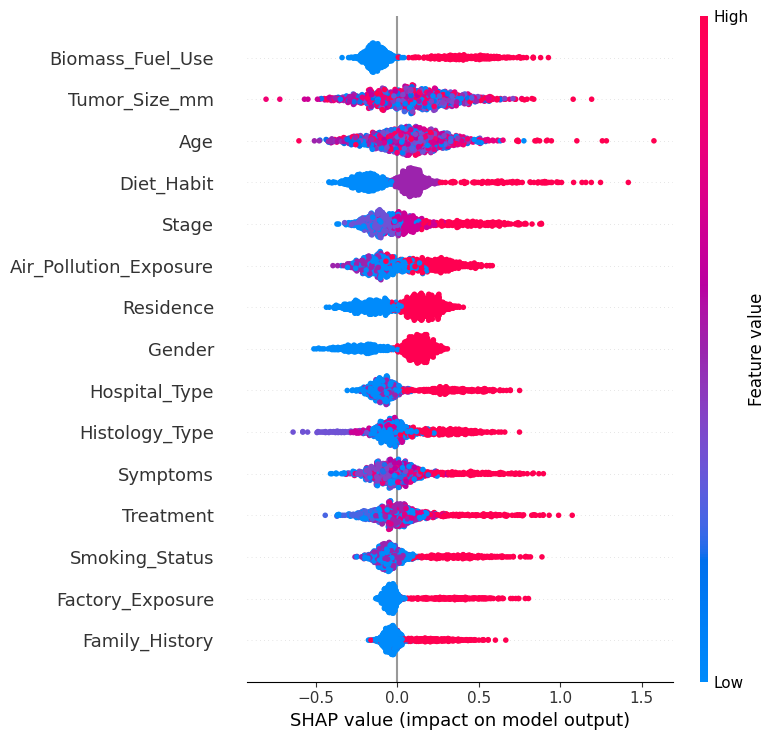

In [21]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


In [22]:
# Install required libraries
!pip install tensorflow imbalanced-learn shap optuna

# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define improved DNN model
dnn_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),  # Bigger layer
    BatchNormalization(),
    Activation('swish'),  # Swish is better than ReLU
    Dropout(0.2),

    Dense(256),
    BatchNormalization(),
    Activation('swish'),
    Dropout(0.2),

    Dense(128),
    BatchNormalization(),
    Activation('swish'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('swish'),

    Dense(32),
    Activation('swish'),

    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile with advanced settings
dnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=1e-5)

# Train the model
history = dnn_model.fit(
    X_train_smote, y_train_smote,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lr_reduction]
)

# Predictions
y_pred_dnn = (dnn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate model
print("Optimized Deep Learning Model Performance:")
print(classification_report(y_test, y_pred_dnn))
print("Accuracy:", accuracy_score(y_test, y_pred_dnn))
print("F1 Score:", f1_score(y_test, y_pred_dnn))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_dnn))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6060 - loss: 0.6619 - val_accuracy: 0.5130 - val_loss: 0.7191 - learning_rate: 0.0010
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6522 - loss: 0.6316 - val_accuracy: 0.5850 - val_loss: 0.7120 - learning_rate: 0.0010
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6594 - loss: 0.6190 - val_accuracy: 0.5980 - val_loss: 0.7323 - learning_rate: 0.0010
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6662 - loss: 0.6177 - val_accuracy: 0.6190 - val_loss: 0.7193 - learning_rate: 0.0010
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6782 - loss: 0.6065 - val_accuracy: 0.5830 - val_loss: 0.7026 - learning_rate: 0.0010
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6685 - loss: 0.6066 - val_accuracy: 0.5960 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6715 - loss: 0.6046 - val_a

# **Hybrid XGBoost + Deep Learning Model**

In [23]:
# Install necessary libraries
!pip install xgboost tensorflow imbalanced-learn shap optuna

# Import required libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import shap

# Load dataset
file_path = "/content/Large_Synthetic_Lung_Cancer_Dataset__Bangladesh_Perspective_.csv"
df = pd.read_csv(file_path)

# Drop Patient_ID as it's not useful for prediction
df.drop(columns=['Patient_ID'], inplace=True)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

# Separate features (X) and target (y)
X = df.drop(columns=['Survival_1_Year'])
y = df['Survival_1_Year']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_smote[X_train_smote.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(X_train_smote[X_train_smote.select_dtypes(include=[np.number]).columns])
X_test[X_test.select_dtypes(include=[np.number]).columns] = scaler.transform(X_test[X_test.select_dtypes(include=[np.number]).columns])

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# Extract predictions from XGBoost (probabilities)
xgb_train_preds = xgb_model.predict_proba(X_train_smote)[:, 1]  # Use probability scores
xgb_test_preds = xgb_model.predict_proba(X_test)[:, 1]

# Train a Deep Learning Model (Meta-Learner)
meta_model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),  # Only one feature (XGBoost score)
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

meta_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the meta-learner on XGBoost probabilities
meta_model.fit(xgb_train_preds, y_train_smote, epochs=50, batch_size=32, validation_data=(xgb_test_preds, y_test))

# Final predictions using ensemble
final_preds = (meta_model.predict(xgb_test_preds) > 0.5).astype("int32")

# Evaluate model
print("Hybrid XGBoost + Deep Learning Model Performance:")
print(classification_report(y_test, final_preds))
print("Accuracy:", accuracy_score(y_test, final_preds))
print("F1 Score:", f1_score(y_test, final_preds))
print("AUC-ROC:", roc_auc_score(y_test, final_preds))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9358 - loss: 0.1898 - val_accuracy: 0.6360 - val_loss: 0.6747
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1051 - val_accuracy: 0.5940 - val_loss: 0.8201
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9675 - loss: 0.0971 - val_accuracy: 0.5940 - val_loss: 1.3397
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9627 - loss: 0.1011 - val_accuracy: 0.5930 - val_loss: 2.0168
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9675 - loss: 0.0954 - val_accuracy: 0.5930 - val_loss: 2.0237
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.0981 - val_accuracy: 0.5850 - val_loss: 1.8888
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9635 - loss: 0.0987 - val_accuracy: 0.5940 - val_loss: 2.3434
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.1045 - val_accuracy: 0.5860 - val_

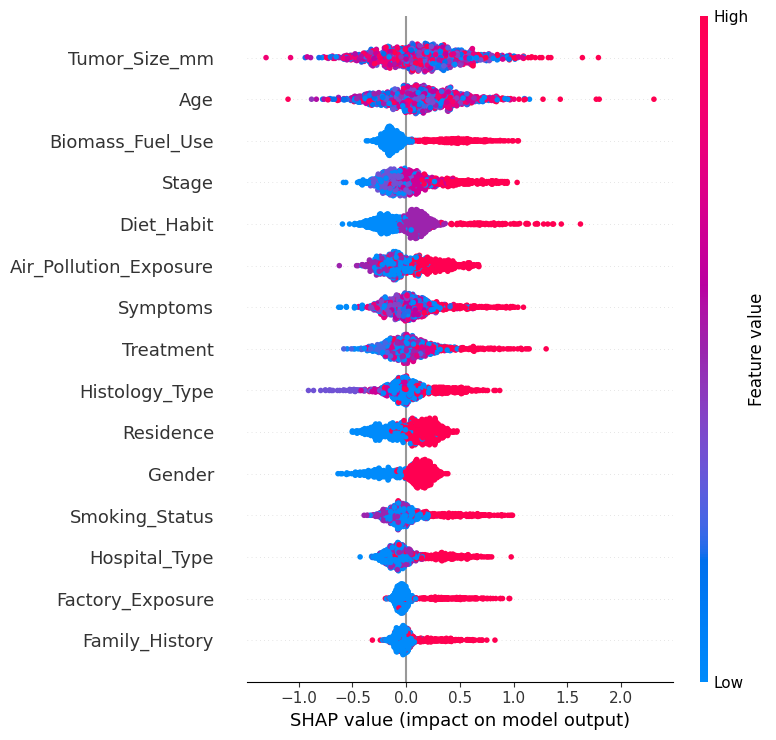

In [24]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


**Since Family_History, Factory_Exposure, Diet_Habit, and Biomass_Fuel_Use have very little impact, we can remove them from our dataset:**

In [25]:
# Drop low-impact features based on SHAP analysis
X_train_selected = X_train_smote.drop(columns=['Family_History', 'Factory_Exposure', 'Diet_Habit', 'Biomass_Fuel_Use'])
X_test_selected = X_test.drop(columns=['Family_History', 'Factory_Exposure', 'Diet_Habit', 'Biomass_Fuel_Use'])

# Retrain XGBoost on selected features
xgb_model.fit(X_train_selected, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate new model performance
print("Updated XGBoost Model Performance After Feature Selection:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))


Updated XGBoost Model Performance After Feature Selection:
              precision    recall  f1-score   support

           0       0.31      0.29      0.30       302
           1       0.70      0.72      0.71       698

    accuracy                           0.59      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.58      0.59      0.59      1000

Accuracy: 0.593
F1 Score: 0.7131782945736435
AUC-ROC: 0.5065039184804265


In [26]:
# Install necessary libraries
!pip install xgboost optuna

import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Feature Engineering (Non-linear interactions)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Define Optuna hyperparameter tuning function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_uniform("gamma", 0, 0.5),
        "lambda": trial.suggest_uniform("lambda", 0, 5),
        "alpha": trial.suggest_uniform("alpha", 0, 5)
    }

    xgb_model = xgb.XGBClassifier(**params, random_state=42)
    xgb_model.fit(X_train_poly, y_train_smote)
    y_pred = xgb_model.predict(X_test_poly)

    return accuracy_score(y_test, y_pred)

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

best_params = study.best_params
print("Best XGBoost Parameters:", best_params)

# Train final optimized XGBoost model
xgb_model = xgb.XGBClassifier(**best_params, random_state=42)
xgb_model.fit(X_train_poly, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_poly)

# Evaluate new model performance
print("Optimized XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))


[I 2025-03-15 10:00:55,846] A new study created in memory with name: no-name-b3dfdcb1-5d5b-4438-bed8-b89ed672c02c
<ipython-input-26-af4caeeb3c76>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
<ipython-input-26-af4caeeb3c76>:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
<ipython-input-26-af4caeeb3c76>:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0

Best XGBoost Parameters: {'n_estimators': 580, 'max_depth': 12, 'learning_rate': 0.033435099494303025, 'subsample': 0.9908105054410307, 'colsample_bytree': 0.7152407339266067, 'gamma': 0.3779357111781654, 'lambda': 2.8293361661553798, 'alpha': 1.5477954727464125}
Optimized XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.29      0.24      0.26       302
           1       0.69      0.75      0.72       698

    accuracy                           0.60      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.57      0.60      0.58      1000

Accuracy: 0.597
F1 Score: 0.7230240549828179
AUC-ROC: 0.49434049981973094


In [29]:
!pip install pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Initialize TabNet model
tabnet = TabNetClassifier(device_name='cuda')

# Train TabNet
tabnet.fit(
    X_train_selected.values, y_train_smote.values,
    eval_set=[(X_test_selected.values, y_test.values)],
    max_epochs=500,
    patience=20,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=4
)

# Make Predictions
y_pred_tabnet = tabnet.predict(X_test_selected.values)

# Evaluate Model
print("TabNet Model Performance:")
print(classification_report(y_test, y_pred_tabnet))
print("Accuracy:", accuracy_score(y_test, y_pred_tabnet))
print("F1 Score:", f1_score(y_test, y_pred_tabnet))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_tabnet))


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 0  | loss: 0.7142  | val_0_auc: 0.47989 |  0:00:01s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 1  | loss: 0.68158 | val_0_auc: 0.47973 |  0:00:02s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 2  | loss: 0.67583 | val_0_auc: 0.4936  |  0:00:03s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 3  | loss: 0.67078 | val_0_auc: 0.49828 |  0:00:04s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 4  | loss: 0.67048 | val_0_auc: 0.4835  |  0:00:05s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 5  | loss: 0.66716 | val_0_auc: 0.48214 |  0:00:06s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 6  | loss: 0.66541 | val_0_auc: 0.50461 |  0:00:07s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 7  | loss: 0.66001 | val_0_auc: 0.48556 |  0:00:08s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 8  | loss: 0.6594  | val_0_auc: 0.47746 |  0:00:09s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 9  | loss: 0.66094 | val_0_auc: 0.48526 |  0:00:10s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 10 | loss: 0.65944 | val_0_auc: 0.48239 |  0:00:11s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 11 | loss: 0.65694 | val_0_auc: 0.48826 |  0:00:12s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 12 | loss: 0.66183 | val_0_auc: 0.48677 |  0:00:14s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 13 | loss: 0.65916 | val_0_auc: 0.49482 |  0:00:15s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 14 | loss: 0.65715 | val_0_auc: 0.48804 |  0:00:16s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 15 | loss: 0.65048 | val_0_auc: 0.47365 |  0:00:18s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 16 | loss: 0.65092 | val_0_auc: 0.48838 |  0:00:19s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 17 | loss: 0.65392 | val_0_auc: 0.48154 |  0:00:21s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 18 | loss: 0.64734 | val_0_auc: 0.49619 |  0:00:22s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 19 | loss: 0.64547 | val_0_auc: 0.46868 |  0:00:23s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 20 | loss: 0.65621 | val_0_auc: 0.46704 |  0:00:25s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 21 | loss: 0.65559 | val_0_auc: 0.4864  |  0:00:25s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 22 | loss: 0.64865 | val_0_auc: 0.47867 |  0:00:26s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 23 | loss: 0.65126 | val_0_auc: 0.48574 |  0:00:27s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 24 | loss: 0.64796 | val_0_auc: 0.48006 |  0:00:28s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 25 | loss: 0.65259 | val_0_auc: 0.48362 |  0:00:29s


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


epoch 26 | loss: 0.65102 | val_0_auc: 0.48132 |  0:00:30s

Early stopping occurred at epoch 26 with best_epoch = 6 and best_val_0_auc = 0.50461


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Model Performance:
              precision    recall  f1-score   support

           0       0.29      0.29      0.29       302
           1       0.69      0.69      0.69       698

    accuracy                           0.57      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.57      0.57      0.57      1000

Accuracy: 0.57
F1 Score: 0.6919770773638968
AUC-ROC: 0.49002827378128616


In [32]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

# Custom Wrapper for TabNet
class TabNetSklearn(BaseEstimator, ClassifierMixin):
    def __init__(self, max_epochs=500, patience=20):
        self.max_epochs = max_epochs
        self.patience = patience
        self.tabnet = TabNetClassifier(device_name='cuda')

    def fit(self, X, y):
        self.tabnet.fit(
            X, y,
            eval_set=[(X, y)],
            max_epochs=self.max_epochs,
            patience=self.patience,
            batch_size=256,
            virtual_batch_size=128,
            num_workers=4
        )
        return self

    def predict(self, X):
        return self.tabnet.predict(X)

    def predict_proba(self, X):
        return self.tabnet.predict_proba(X)

# Initialize Wrapped TabNet
tabnet_sklearn = TabNetSklearn()


In [40]:
!pip install imbalanced-learn shap


In [41]:
!pip install --upgrade --force-reinstall shap numba llvmlite


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 

In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Load the dataset
file_path = "/content/Large_Synthetic_Lung_Cancer_Dataset__Bangladesh_Perspective_.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns (e.g., Patient_ID)
if "Patient_ID" in df.columns:
    df = df.drop(columns=["Patient_ID"])

# Convert categorical columns to numerical using Label Encoding
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Check for missing values and fill if necessary
df.fillna(df.median(), inplace=True)

# Separate features (X) and target variable (y)
target_col = "Survival_1_Year"  # Adjust this based on actual dataset
X = df.drop(columns=[target_col])
y = df[target_col]

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train models after balancing
rf_model_balanced = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)
gb_model_balanced = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=8, random_state=42)

rf_model_balanced.fit(X_train_balanced, y_train_balanced)
gb_model_balanced.fit(X_train_balanced, y_train_balanced)

# Compute SHAP feature importance
explainer = shap.TreeExplainer(rf_model_balanced)
shap_values = explainer.shap_values(X_train_balanced)

# Ensure SHAP values are 2D
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # Select the class-specific SHAP values

# Compute mean SHAP importance per feature
shap_importance = pd.DataFrame({
    "Feature": X.columns,
    "SHAP Importance": np.abs(shap_values).mean(axis=0)
}).sort_values(by="SHAP Importance", ascending=False)

# Identify least important features (bottom 20%)
low_impact_features = shap_importance.tail(int(0.2 * len(shap_importance))).Feature.tolist()

# Drop least important features
X_train_selected = pd.DataFrame(X_train_balanced, columns=X.columns).drop(columns=low_impact_features)
X_test_selected = pd.DataFrame(X_test, columns=X.columns).drop(columns=low_impact_features)

# Retrain models on optimized feature set
rf_model_optimized = RandomForestClassifier(n_estimators=150, max_depth=12, class_weight="balanced", random_state=42)
gb_model_optimized = GradientBoostingClassifier(n_estimators=150, learning_rate=0.03, max_depth=10, random_state=42)

rf_model_optimized.fit(X_train_selected, y_train_balanced)
gb_model_optimized.fit(X_train_selected, y_train_balanced)

# Create an optimized ensemble model
ensemble_model_optimized = VotingClassifier(
    estimators=[('rf', rf_model_optimized), ('gb', gb_model_optimized)],
    voting='soft'
)

# Train the ensemble model
ensemble_model_optimized.fit(X_train_selected, y_train_balanced)

# Make Predictions
y_pred_ensemble_optimized = ensemble_model_optimized.predict(X_test_selected)

# Evaluate the optimized ensemble model
accuracy_optimized = accuracy_score(y_test, y_pred_ensemble_optimized)
f1_optimized = f1_score(y_test, y_pred_ensemble_optimized)
auc_roc_optimized = roc_auc_score(y_test, y_pred_ensemble_optimized)
report_optimized = classification_report(y_test, y_pred_ensemble_optimized)

# Print Performance Metrics
print("Optimized Ensemble Model Performance:")
print(report_optimized)
print("Accuracy:", accuracy_optimized)
print("F1 Score:", f1_optimized)
print("AUC-ROC:", auc_roc_optimized)